In [1]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
from neurodsp.timefrequency import amp_by_time



On procede à une visualisation de différentes caractéristiques des signaux, on concentrera la visualistaion sur l'ensemeble des signaux(toutes conditions experimetale confondues). On regarde en premier les signaux eeg evoked (signaux du meme type d'event moyenné).

In [2]:

file_path = r"C:\Users\phili\EEG_project\EEG_proj_data\ucsd-neural-data-challenge\data\epoch_propre\all_epochs_combined-epo.fif"
epochs = mne.read_epochs(file_path)
print(epochs)

print(epochs.metadata)

print(epochs.event_id)  
print(epochs.events)    

print("Number of epochs:", len(epochs))
print("Number of channels:", len(epochs.info["ch_names"]))
print("Sampling frequency:", epochs.info["sfreq"])


Reading C:\Users\phili\EEG_project\EEG_proj_data\ucsd-neural-data-challenge\data\epoch_propre\all_epochs_combined-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 3) active
    Found the data of interest:
        t =       0.00 ...    4000.00 ms
        0 CTF compensation matrices available
Not setting metadata
3680 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
<EpochsFIF |  3680 events (all good), 0 – 4 s, baseline -0.2 – 0 s (baseline period was cropped after baseline correction), ~168.6 MB, data loaded,
 'Event_0': 1840
 'Event_1': 1840>
None
{'Event_0': 0, 'Event_1': 1}
[[   55889        0        0]
 [   58249        0        1]
 [   62817        0        0]
 ...
 [15357403        0        1]
 [15360024        0        0]
 [15362759        0        0]]
Number of epochs: 3680
Number of channels: 6
Sampling frequency: 250.0


In [3]:
print(epochs.info["ch_names"])

print(mne.io.pick.channel_type(epochs.info, idx=0)) 
print(epochs.get_channel_types()) 


['C3', 'Cz', 'C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
eeg
['eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog']


C:\Users\phili\AppData\Local\Temp\ipykernel_18436\2593421391.py:3: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
  print(mne.io.pick.channel_type(epochs.info, idx=0))


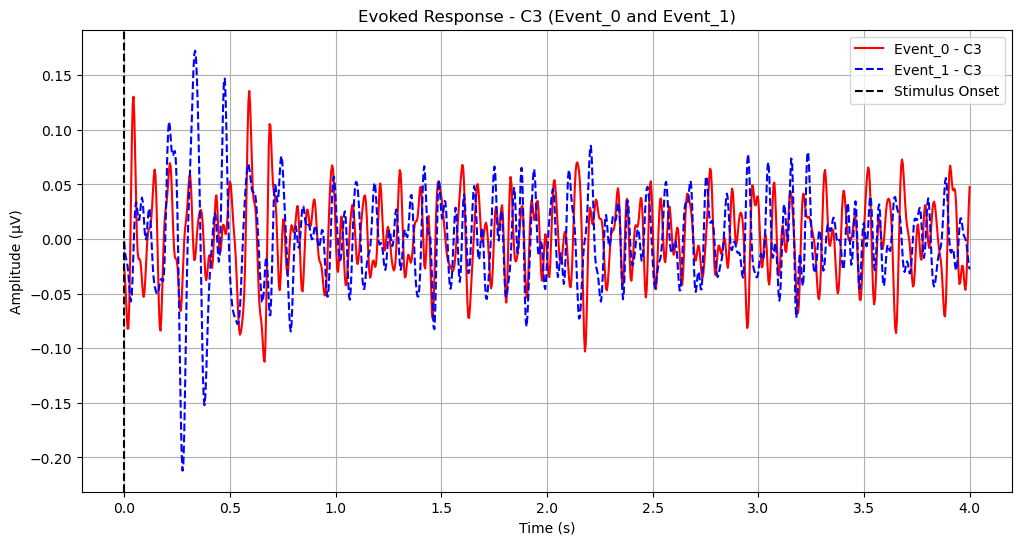

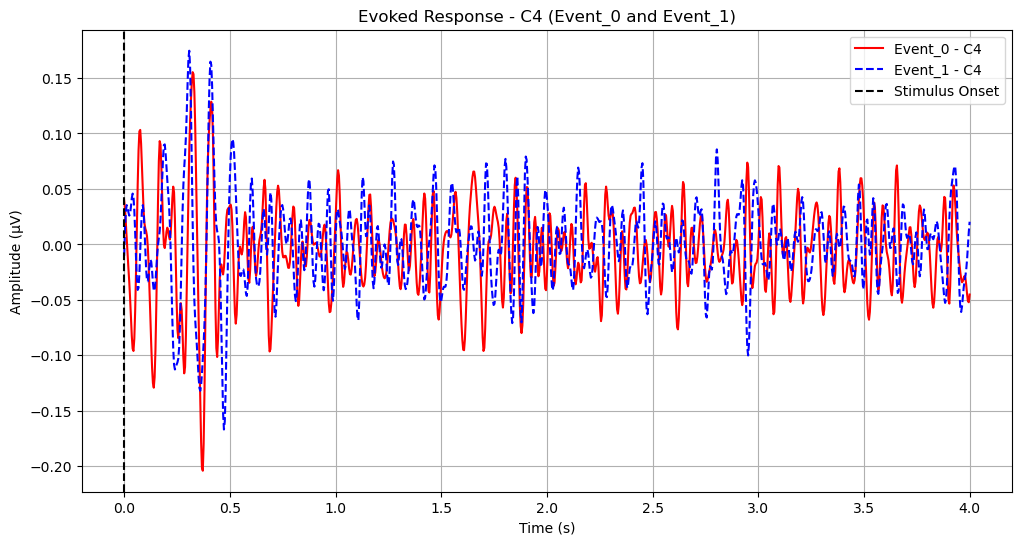

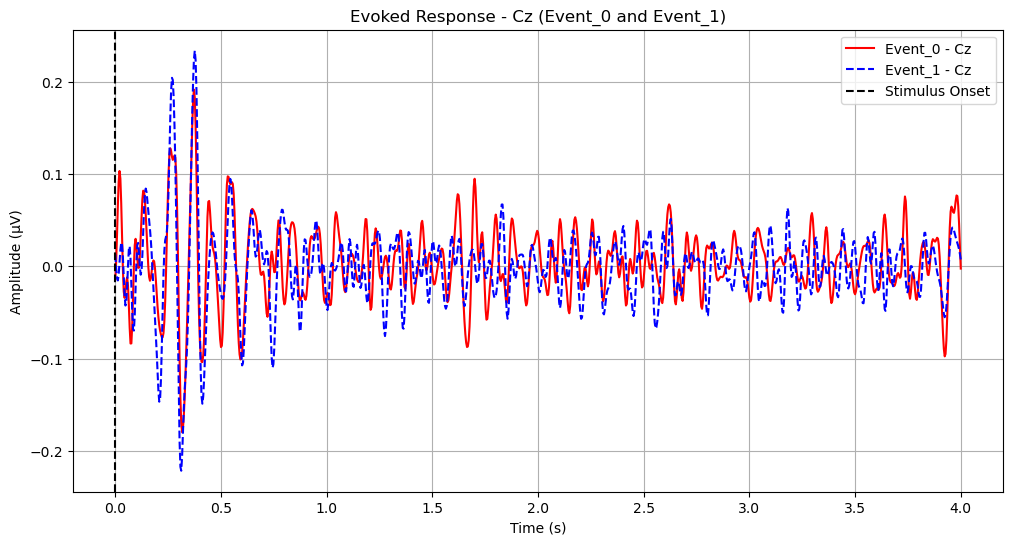

In [4]:

left_epochs = epochs['Event_0']
right_epochs = epochs['Event_1'] 

evoked_left = left_epochs.average(picks='all')
evoked_right = right_epochs.average(picks='all')

plt.figure(figsize=(12, 6))
plt.plot(evoked_left.times, evoked_left.data[evoked_left.ch_names.index('C3')], label='Event_0 - C3', color='red', linestyle='-')
plt.plot(evoked_right.times, evoked_right.data[evoked_right.ch_names.index('C3')], label='Event_1 - C3', color='blue', linestyle='--')
plt.title('Evoked Response - C3 (Event_0 and Event_1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(evoked_left.times, evoked_left.data[evoked_left.ch_names.index('C4')], label='Event_0 - C4', color='red', linestyle='-')
plt.plot(evoked_right.times, evoked_right.data[evoked_right.ch_names.index('C4')], label='Event_1 - C4', color='blue', linestyle='--')
plt.title('Evoked Response - C4 (Event_0 and Event_1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(evoked_left.times, evoked_left.data[evoked_left.ch_names.index('Cz')], label='Event_0 - Cz', color='red', linestyle='-')
plt.plot(evoked_right.times, evoked_right.data[evoked_right.ch_names.index('Cz')], label='Event_1 - Cz', color='blue', linestyle='--')
plt.title('Evoked Response - Cz (Event_0 and Event_1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')
plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')
plt.legend(loc='best')
plt.grid(True)
plt.show()


On observe les PSD des deux types d'event nottament, dans la zone mu ce qui corrspond à la fréquence motrice. Puis à l'evolution de l'amplitude de béta, car la latéralisation ddes rythmes bêta liés au mouvement est plus forte qu'alpha ou mu.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\phili\AppData\Local\Temp\ipykernel_18436\517464409.py:8: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs_condition.copy().pick_channels(['C3', 'Cz', 'C4']).get_data()


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


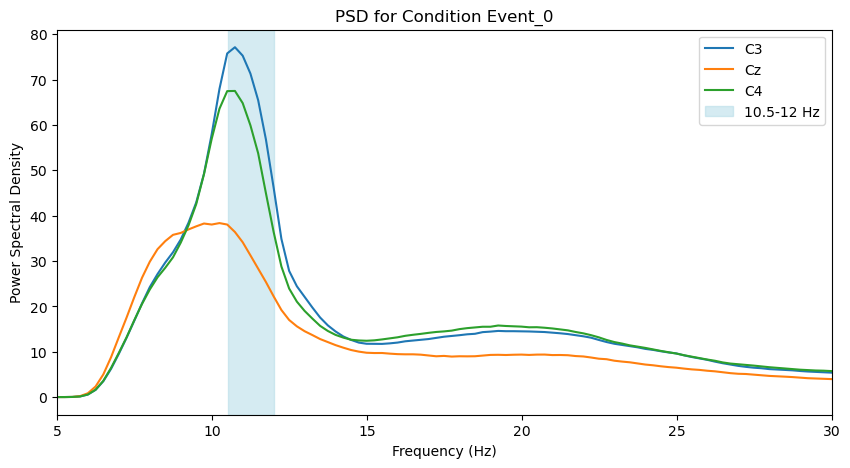

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\phili\AppData\Local\Temp\ipykernel_18436\517464409.py:8: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs_condition.copy().pick_channels(['C3', 'Cz', 'C4']).get_data()


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


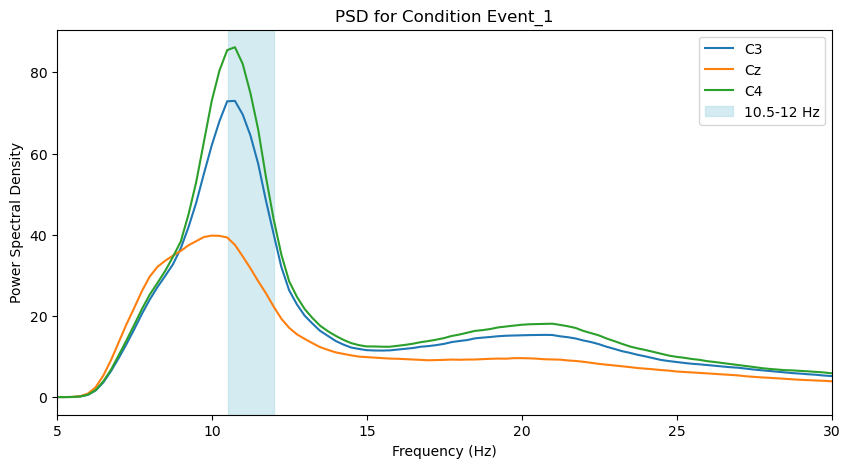

In [5]:

mu_band = (10.5, 12)

sfreq = epochs.info['sfreq']

for event_id, condition in zip([0, 1], ["Event_0", "Event_1"]):
    epochs_condition = epochs[condition]

    eeg_data = epochs_condition.copy().pick_channels(['C3', 'Cz', 'C4']).get_data()

    psds = []
    for ch in range(eeg_data.shape[1]): 
        psd, freqs = psd_array_multitaper(eeg_data[:, ch, :], sfreq=sfreq, fmin=1, fmax=40)
        psds.append(psd.mean(axis=0)) 

    plt.figure(figsize=(10, 5))
    for i, ch_name in enumerate(['C3', 'Cz', 'C4']):
        plt.plot(freqs, psds[i], label=ch_name) 

    plt.axvspan(mu_band[0], mu_band[1], color='lightblue', alpha=0.5, label="10.5-12 Hz")

    plt.xlim(5, 30)

    plt.title(f"PSD for Condition {condition}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.legend(loc="upper right")
    plt.show()


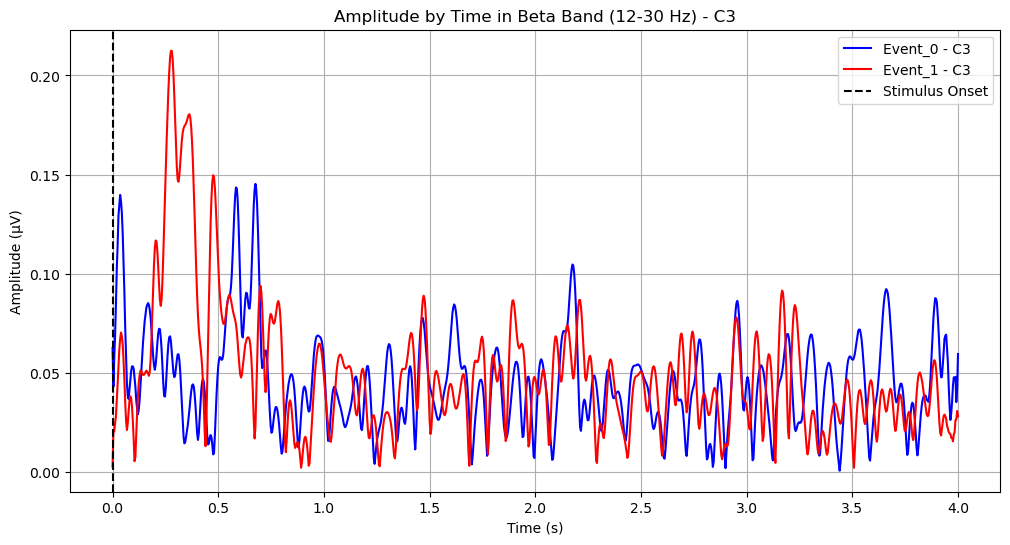

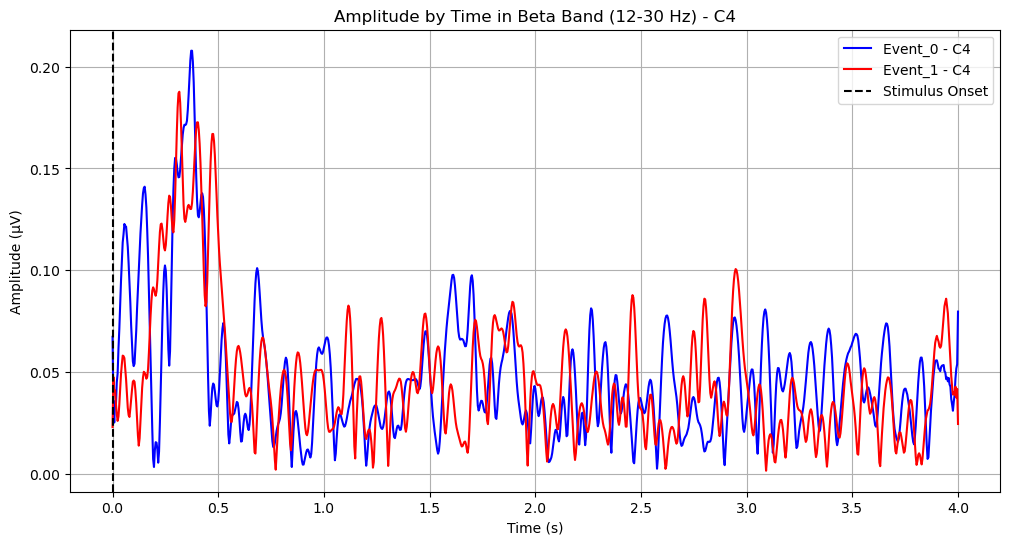

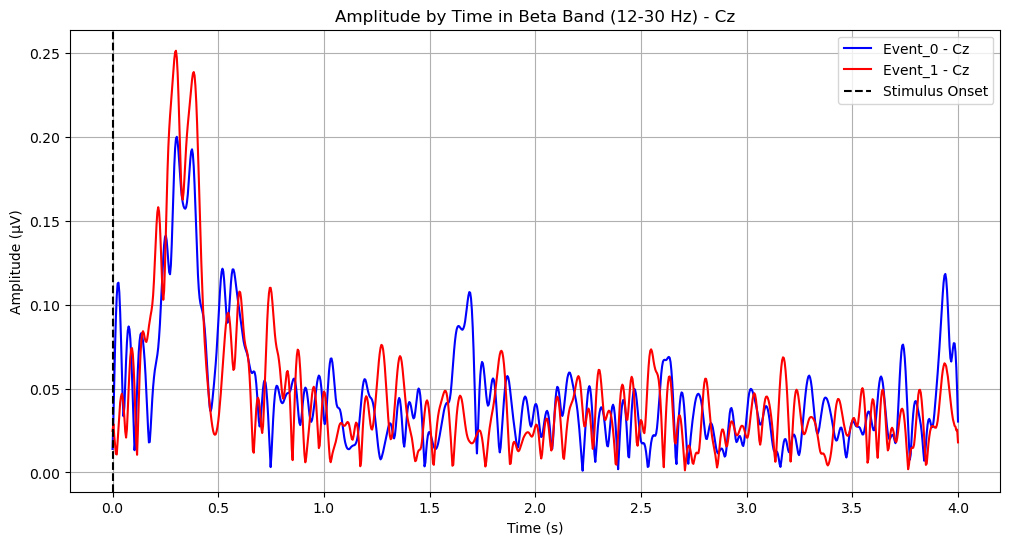

In [6]:
beta_band = (12, 30)

def plot_amp_by_time(evoked_left, evoked_right, event_name_left, event_name_right, beta_band, channels):
    for ch in channels:
        data_left = evoked_left.get_data(picks=ch)[0]  
        data_right = evoked_right.get_data(picks=ch)[0]
        
        amp_left = amp_by_time(data_left, fs=evoked_left.info['sfreq'], band=beta_band)
        amp_right = amp_by_time(data_right, fs=evoked_right.info['sfreq'], band=beta_band)
        
        plt.figure(figsize=(12, 6))
        plt.plot(evoked_left.times, amp_left, label=f'{event_name_left} - {ch}', color='blue')
        plt.plot(evoked_right.times, amp_right, label=f'{event_name_right} - {ch}', color='red')
        
        plt.title(f'Amplitude by Time in Beta Band ({beta_band[0]}-{beta_band[1]} Hz) - {ch}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (μV)')
        plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

channels = ['C3', 'C4', 'Cz']

plot_amp_by_time(left_epochs.average(picks='all'), right_epochs.average(picks='all'),
                 'Event_0', 'Event_1', beta_band, channels)


Applying baseline correction (mode: mean)


<Figure size 1200x600 with 0 Axes>

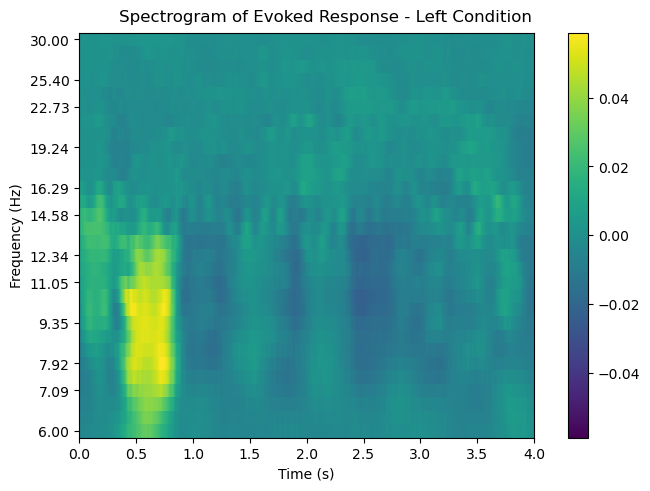

Applying baseline correction (mode: mean)


<Figure size 1200x600 with 0 Axes>

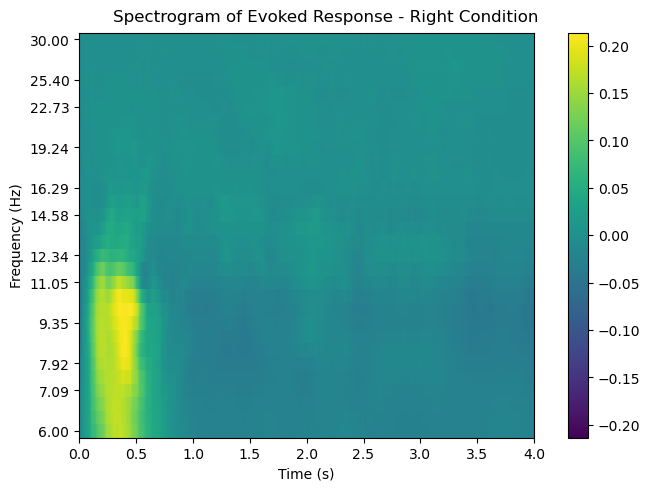

Applying baseline correction (mode: mean)


<Figure size 1200x600 with 0 Axes>

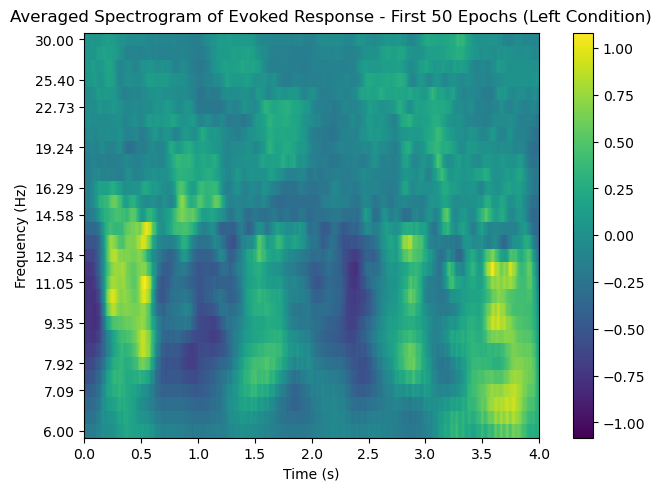

Applying baseline correction (mode: mean)


<Figure size 1200x600 with 0 Axes>

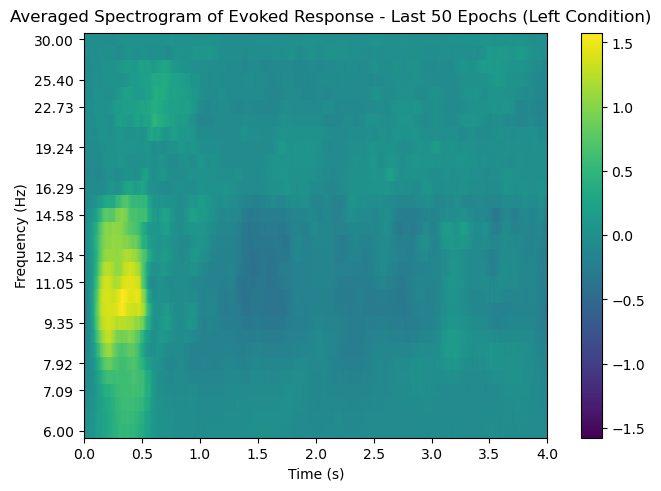

[<Figure size 640x480 with 2 Axes>]

In [7]:
frequencies = np.logspace(*np.log10([6, 30]), num=30)  

power_left = mne.time_frequency.tfr_multitaper(evoked_left, freqs=frequencies, n_cycles=frequencies / 2., 
                                               return_itc=False, average=True)
power_right = mne.time_frequency.tfr_multitaper(evoked_right, freqs=frequencies, n_cycles=frequencies / 2., 
                                                 return_itc=False, average=True)

plt.figure(figsize=(12, 6))
power_left.plot([0], baseline=(None, None), mode='mean', title='Spectrogram of Evoked Response - Left Condition',
                 cmap='viridis', colorbar=True, show=True)

plt.figure(figsize=(12, 6))
power_right.plot([0], baseline=(None, None), mode='mean', title='Spectrogram of Evoked Response - Right Condition',
                  cmap='viridis', colorbar=True, show=True)

left_first_50 = left_epochs[:50]
left_last_50 = left_epochs[-50:]

evoked_left_first_50 = left_first_50.average(picks='all')
evoked_left_last_50 = left_last_50.average(picks='all')

plt.figure(figsize=(12, 6))
power_left_first_50 = mne.time_frequency.tfr_multitaper(evoked_left_first_50, freqs=frequencies, n_cycles=frequencies / 2., 
                                                       return_itc=False, average=True)
power_left_first_50.plot([0], baseline=(None, None), mode='mean',
                          title='Averaged Spectrogram of Evoked Response - First 50 Epochs (Left Condition)',
                          cmap='viridis', colorbar=True, show=True)

plt.figure(figsize=(12, 6))
power_left_last_50 = mne.time_frequency.tfr_multitaper(evoked_left_last_50, freqs=frequencies, n_cycles=frequencies / 2., 
                                                      return_itc=False, average=True)
power_left_last_50.plot([0], baseline=(None, None), mode='mean',
                         title='Averaged Spectrogram of Evoked Response - Last 50 Epochs (Left Condition)',
                         cmap='viridis', colorbar=True, show=True)

On a finalement tracé les spéctrogramme on voit une activation marqué au début,  mais on peut aussi observer un biais entre les performances de nf (dernieres) et celle de screening (premieres). 